# Partición


In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os
from sklearn.model_selection import StratifiedShuffleSplit


In [16]:
# importo los datos
import pickle
with open('faces_dict.p', 'rb') as handle:
        faces = pickle.load(handle)
faces


dict

In [4]:
# inicio el metodo
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
# obtengo los indices para el train_valid y el test. (¿porque usa el next?)
train_valid_idx, test_idx = next(strat_split.split(faces['data'], faces['target']))
# genero el train y test
X_train_valid = faces['data'][train_valid_idx]
y_train_valid = faces['target'][train_valid_idx]
X_test = faces['data'][test_idx]
y_test = faces['target'][test_idx]

# mismo procedimiento pero separo el train de la validacion
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]


__faces__ es un diccionario que tiene tres key: 'data', 'image', 'terget'. Image es la matriz de grayscale que se puede usar para plotear la imagen, mientras que data son los mismos datos pero puestos en un array de 1D. Este ultimo van a ser los usados para entrenar, validar y testear el modelo.

* Separo del conjunto de datos el {train, validation, test}_set. Como son solo 400 fotos, me aseguro que este balanceado la cantidad de fotos por clases en cada set. Esto lo propongo de esta forma porque lo que estoy interesado es que mi modelo clasifique bien 40 ID de personas. Podria pasar que si no hago una particion balanceada, en el test o valid no tenga fotos de algun ID y no pueda calcular que tmbien clasifica en todos los casos mi modelo. 


* Comienzo por aca, luego puedo hacer un data augementation para aumentar la cantidad de datos. (**COMPLETAR**)



In [8]:
# inspeccion de los tamaños de las matrices de faces.images
n_samples, h, w = faces['images'].shape

# Variable X y features para el el modelo de ML
X = faces['data']
n_features = X.shape[1]

# El target a predecir es la ID de la persona.
y = faces['target']
n_classes = len(np.unique(y))

print("Dimensiones de la matriz faces.image:")
print("h: %d" % h)
print("w: %d" % w)
print("Tamaño total de la data:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Dimensiones de la matriz faces.image:
h: 64
w: 64
Tamaño total de la data:
n_samples: 400
n_features: 4096
n_classes: 40


#### Grafico los porcentajes de las particiones

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


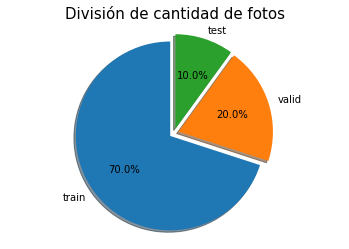

In [9]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
totalsize=X_train.shape[0]+X_valid.shape[0]+X_test.shape[0]

labels = 'train', 'valid', 'test'
sizes = [X_train.shape[0]/totalsize, X_valid.shape[0]/totalsize, X_test.shape[0]/totalsize]
explode = (0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.set_title('División de cantidad de fotos', fontsize=15)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Hasta aca tengo particionado la data (y augmentada) en:
    1. Train..70% --> 280
    2. Valid..20% --> 80
    3. Test...10% --> 40


### Guardo los datos

In [20]:
train = {}
train['X']=X_train
train['y']=y_train
with open('faces_dict_train.p', 'wb') as handle:
    pickle.dump(train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
valid = {}
valid['X']=X_valid
valid['y']=y_valid
with open('faces_dict_valid.p', 'wb') as handle:
    pickle.dump(valid, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
test = {}
test['X']=X_test
test['y']=y_test
with open('faces_dict_test.p', 'wb') as handle:
    pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL)

Object `pickle.save` not found.
